In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("/content/train.csv")

In [4]:
#информация о датафрейме

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


*Средний* и *медианный* возраст выживших и нет:

In [ ]:
df[["Survived", "Age"]].groupby("Survived").agg(["mean", "median"])

Age       
               mean median
Survived                  
0         30.626179   28.0
1         28.343690   28.0

Количество *выживших*, *общее* количество пассажиров и *процент* выживаемости в зависимости **от пола**:

       Survived                
            sum count      mean
Sex                            
female      233   314  0.742038
male        109   577  0.188908


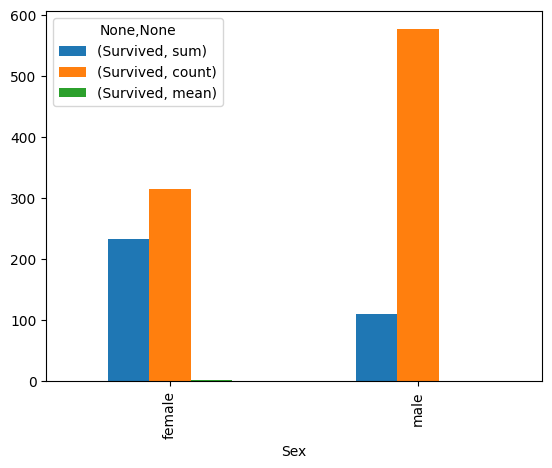

In [ ]:
df_by_Sex = df[["Sex", "Survived"]].groupby("Sex").agg(["sum", "count", "mean"])
df_by_Sex.plot.bar()
print(df_by_Sex)

Количество *выживших*, *общее* количество пассажиров и *процент* выживаемости в зависимости от **класса**:

       Survived                
            sum count      mean
Pclass                         
1           136   216  0.629630
2            87   184  0.472826
3           119   491  0.242363


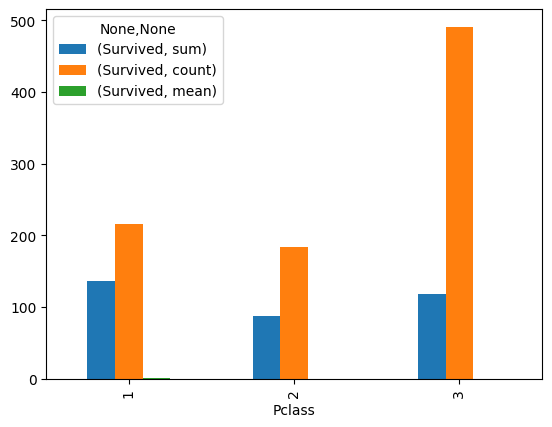

In [5]:
df_by_Class = df[["Pclass", "Survived"]].groupby("Pclass").agg(["sum", "count", "mean"])
df_by_Class.plot.bar()
print(df_by_Class)

Количество *выживших*, *общее* количество пассажиров и *процент* выживаемости в зависимости **от возраста**:

       Survived                
            sum count      mean
Age                            
0-20         82   179  0.458101
20-30        84   230  0.365217
30-50       102   241  0.423237
50-100       22    64  0.343750


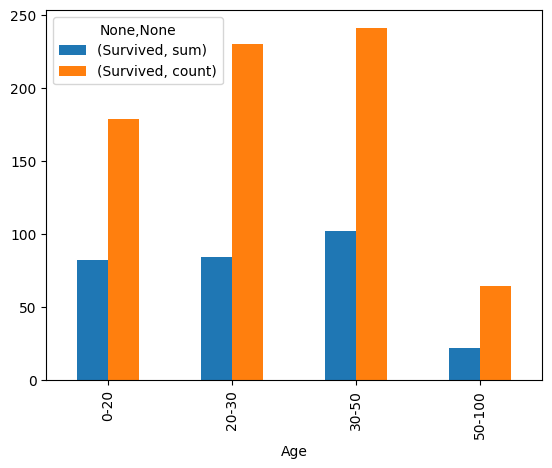

In [ ]:
df_copy = df.copy()
df_copy["Age"] = pd.cut(df_copy["Age"], bins = [0, 20, 30, 50, 100], labels=['0-20', '20-30', '30-50', '50-100'])
df_copy[["Age", "Survived"]].groupby("Age").agg(["sum", "count"]).plot.bar()
print(df_copy[["Age", "Survived"]].groupby("Age").agg(["sum", "count", "mean"]))

*Количество выживших*, *общее* количество пассажиров и *процент* выживаемости в зависимости **от количества братьев/сестёр/супругов на борту**:

      Survived                
           sum count      mean
SibSp                         
0          210   608  0.345395
1          112   209  0.535885
2           13    28  0.464286
3            4    16  0.250000
4            3    18  0.166667
5            0     5  0.000000
8            0     7  0.000000


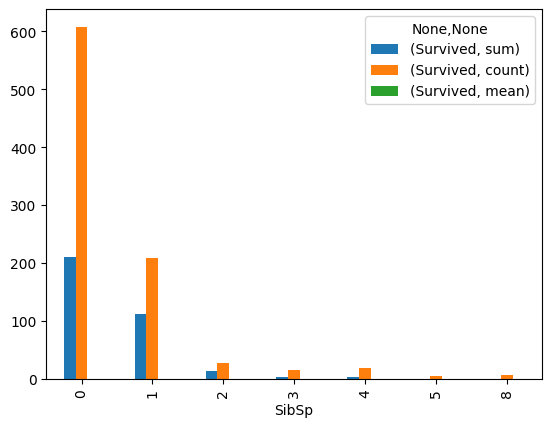

In [ ]:
df_by_SipSp = df[["Survived", "SibSp"]].groupby("SibSp").agg(["sum", "count", "mean"])
df_by_SipSp.plot.bar()
print(df_by_SipSp)

*Количество выживших*, *общее* количество пассажиров и *процент* выживаемости в зависимости **от количества родителей/детей на борту**:

      Survived                
           sum count      mean
Parch                         
0          233   678  0.343658
1           65   118  0.550847
2           40    80  0.500000
3            3     5  0.600000
4            0     4  0.000000
5            1     5  0.200000
6            0     1  0.000000


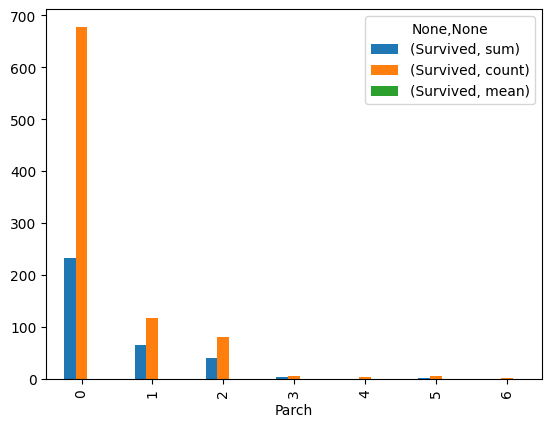

In [ ]:
df_by_Parch = df[["Survived", "Parch"]].groupby("Parch").agg(["sum", "count", "mean"])
df_by_Parch.plot.bar()
print(df_by_Parch)

In [ ]:
df.sort_values("Name")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
845,846,0,3,"Abbing, Mr. Anthony",male,42.0,0,0,C.A. 5547,7.5500,NaN,S
746,747,0,3,"Abbott, Mr. Rossmore Edward",male,16.0,1,1,C.A. 2673,20.2500,NaN,S
279,280,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20.2500,NaN,S
308,309,0,2,"Abelson, Mr. Samuel",male,30.0,1,0,P/PP 3381,24.0000,NaN,C
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
286,287,1,3,"de Mulder, Mr. Theodore",male,30.0,0,0,345774,9.5000,NaN,S
282,283,0,3,"de Pelsmaeker, Mr. Alfons",male,16.0,0,0,345778,9.5000,NaN,S
361,362,0,2,"del Carlo, Mr. Sebastiano",male,29.0,1,0,SC/PARIS 2167,27.7208,NaN,C
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5000,NaN,S


Найти семьи, находящиеся на борту:

*   обычно одинаковые номера билетов
*   для родителей/детей parch > 0
*   для братьев/сестёр/супругов sibsp > 0
*   порт посадки должен совпадать





In [ ]:
# Создаём словарь с фамилиями семей и именами членов семьи

families = {}

for full_name in df["Name"][(df["SibSp"] > 0) | (df["Parch"] > 0)]:
  surname, name = full_name.split(', ', 1)
  if surname not in families:
    families[surname] = []
  families[surname].append(full_name)

In [ ]:
# функция для нового поля

def if_have_family(name: str) -> bool:
  if name.split(',')[0] in families and name in families[name.split(',')[0]]:
    return 1
  else:
    return 0

In [ ]:
# заполняем новое поле

df["HaveFamily"] = df["Name"].apply(if_have_family)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HaveFamily
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


Количество *выживших*, *общее* количество пассажиров и *процент* выживаемости в зависимости от того, **есть ли члены семьи на борту**:

           Survived                
                sum count      mean
HaveFamily                         
0               163   537  0.303538
1               179   354  0.505650


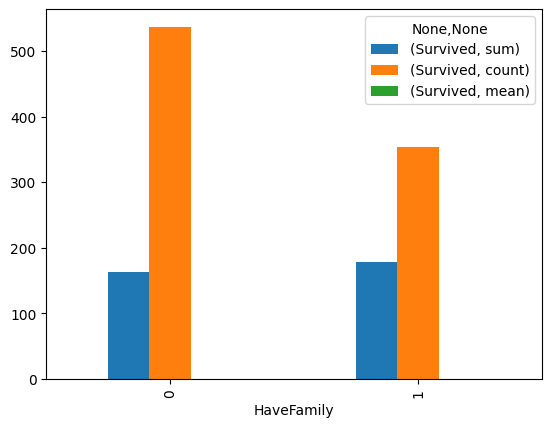

In [ ]:
df_by_family = df[["Survived", "HaveFamily"]].groupby("HaveFamily").agg(["sum", "count", "mean"])
df_by_family.plot.bar()
print(df_by_family)

Количество *выживших*, *общее* количество детей до 18 и *процент* выживаемости в зависимости от того, **есть ли члены семьи на борту**:

           Survived                
                sum count      mean
HaveFamily                         
0                10    23  0.434783
1                51    90  0.566667


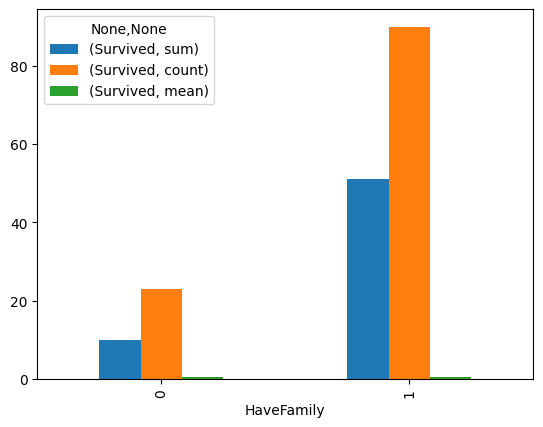

In [ ]:
df_children = df[["Survived", "HaveFamily"]][df["Age"] < 18].groupby("HaveFamily").agg(["sum", "count", "mean"])
df_children.plot.bar()
print(df_children)

In [ ]:
df.corr()

<ipython-input-109-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,HaveFamily
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.057462
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.203367
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.135207
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.198270
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.584471
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.583398
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.271832
HaveFamily,-0.057462,0.203367,-0.135207,-0.198270,0.584471,0.583398,0.271832,1.000000


*Интересная зависимость*: если есть семья на борту, то средняя цена билета выше

In [ ]:
df[["HaveFamily", "Fare"]].groupby("HaveFamily").agg(["min", "mean", "max"])

Fare                     
               min       mean       max
HaveFamily                             
0           0.0000  21.242689  512.3292
1           6.4958  48.832275  512.3292

In [6]:
df["FamilyMembers"] = df["SibSp"] + df["Parch"]

Количество *выживших*, *общее* количество мужцин на борту и *процент* выживаемости в зависимости **от размера семьи**

              Survived                
                   sum count      mean
FamilyMembers                         
0                   64   411  0.155718
1                   18    74  0.243243
2                   21    53  0.396226
3                    5    10  0.500000
4                    0     3  0.000000
5                    0    14  0.000000
6                    1     4  0.250000
7                    0     4  0.000000
10                   0     4  0.000000


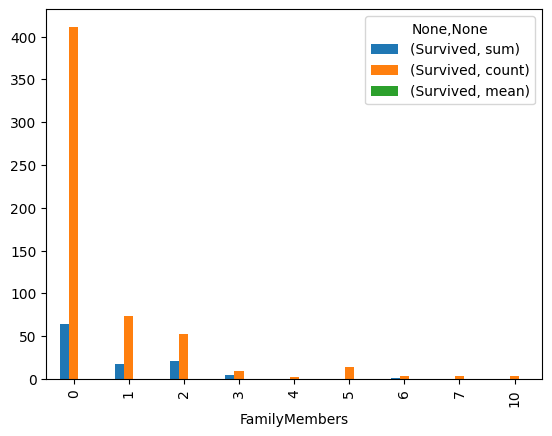

In [8]:
df_by_family_size = df[["FamilyMembers", "Survived"]][df["Sex"] == 'male'].groupby("FamilyMembers").agg(["sum",  "count", "mean"])
df_by_family_size.plot.bar()
print(df_by_family_size)

Количество *выживших*, *общее* количество женщин на борту и *процент* выживаемости в зависимости **от размера семьи**

              Survived                
                   sum count      mean
FamilyMembers                         
0                   99   126  0.785714
1                   71    87  0.816092
2                   38    49  0.775510
3                   16    19  0.842105
4                    3    12  0.250000
5                    3     8  0.375000
6                    3     8  0.375000
7                    0     2  0.000000
10                   0     3  0.000000


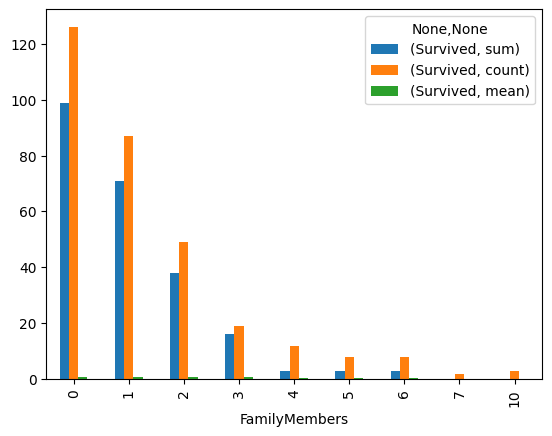

In [9]:
df_by_family_size = df[["FamilyMembers", "Survived"]][df["Sex"] == 'female'].groupby("FamilyMembers").agg(["sum",  "count", "mean"])
df_by_family_size.plot.bar()
print(df_by_family_size)